In [1]:
%matplotlib inline
import numpy as np
model_folder='../../results/NCOUNT_2009/'
import umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_umaps={}
guided_umaps={}
all_base={}
all_guided={}
type_=''
i=1
for layer in ['mixed10','finetuned_features1', 'finetuned_features2', 'finetuned_features3']:
    print(layer)
    feats=np.load('{}/{}features{}.npy'.format(model_folder, type_,layer))
    idxs=np.random.choice(np.arange(len(feats)), size=4000, replace=False)
    to_transform=feats[idxs]
    embedding = umap.UMAP().fit_transform(to_transform)
    features_df = pd.DataFrame(data=embedding, columns=['x', 'y'])
    labs=np.load('{}/{}labels{}.npy'.format(model_folder,type_, layer))
    cvals=np.load('{}/{}cvalues{}.npy'.format(model_folder,type_, layer))
    features_df['label']= labs[idxs]
    features_df['cval']= cvals[idxs]
    feats=np.load('{}/{}base_features{}.npy'.format(model_folder, type_,layer))
    to_transform=feats[idxs]
    embedding = umap.UMAP().fit_transform(to_transform)
    base_features_df = pd.DataFrame(data=embedding, columns=['x', 'y'])
    labs=np.load('{}/{}base_labels{}.npy'.format(model_folder,type_, layer))
    cvals=np.load('{}/{}base_cvalues{}.npy'.format(model_folder,type_, layer))
    base_features_df['label']= labs[idxs]
    base_features_df['cval']= cvals[idxs]
    small=features_df.where(features_df['cval']<-1.2)  
    big=features_df.where(features_df['cval']>1.2)
    print('concatenating')
    df=pd.concat([small, big])
    base_small=base_features_df.where(base_features_df['cval']<-1.2)  
    base_big=base_features_df.where(base_features_df['cval']>1.2)
    base_df=pd.concat([base_small, base_big])
    base_umaps[layer]=base_df
    guided_umaps[layer]=df
    all_base[layer]=base_features_df
    all_guided[layer]=features_df
    

mixed10
concatenating
finetuned_features1
concatenating
finetuned_features2
concatenating
finetuned_features3
concatenating


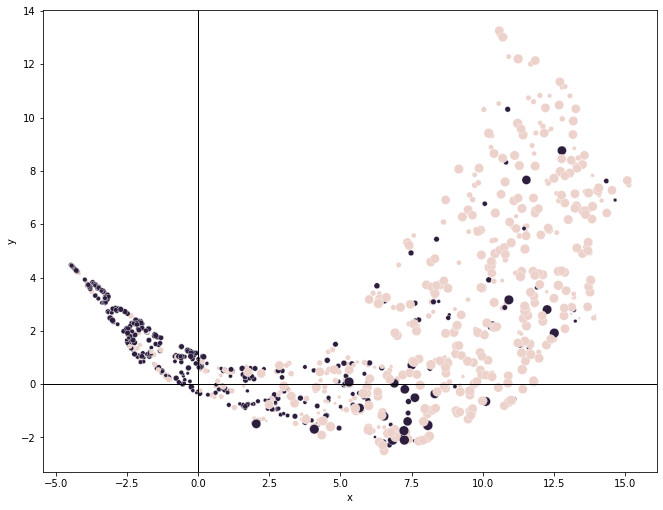

In [55]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

fig, ax = plt.subplots(figsize=(11, 8.5))
sns.scatterplot(x="x", y="y",
                 hue="label",
                size="cval",sizes=(5,100),
                 #palette="Set2",
                data=base_umaps['finetuned_features1'],
                legend=False)
ax.axhline(y=0, color='k', linewidth=1)  # added because i want the origin
ax.axvline(x=0, color='k', linewidth=1)

fitted = smf.ols(formula='x ~ cval', data=base_umaps['finetuned_features1']).fit(cov_type='HC3')

#x_pred = np.linspace(x.min() - 1, x.max() + 1, 50)
X = data['x'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data['cval'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#plt.plot(X,Y_pred)#, ax=ax)

#sns.regplot(x="x", y="cval",
                 #hue="label",
                #size="cval",sizes=(5,100),
                 #palette="Set2",
#                data=base_umaps['finetuned_features1'],)

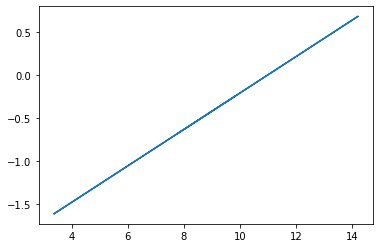

In [56]:
plt.plot(X,Y_pred)#, ax=ax)

In [44]:
x_pred = np.linspace(x.min() - 1, x.max() + 1, 50)

In [54]:
len(X)

4000

In [5]:
from sklearn.linear_model import LinearRegression

In [12]:
data=all_guided['finetuned_features1']

In [38]:
Y_pred.ravel()

array([-0.6744212 ,  0.2803254 ,  0.13332605, ..., -0.4312154 ,
        0.4594226 , -0.2460823 ], dtype=float32)

In [39]:
x_pred

array([ 2.35913849,  2.62162717,  2.88411584,  3.14660452,  3.4090932 ,
        3.67158187,  3.93407055,  4.19655922,  4.4590479 ,  4.72153658,
        4.98402525,  5.24651393,  5.50900261,  5.77149128,  6.03397996,
        6.29646864,  6.55895731,  6.82144599,  7.08393467,  7.34642334,
        7.60891202,  7.8714007 ,  8.13388937,  8.39637805,  8.65886673,
        8.9213554 ,  9.18384408,  9.44633276,  9.70882143,  9.97131011,
       10.23379879, 10.49628746, 10.75877614, 11.02126482, 11.28375349,
       11.54624217, 11.80873085, 12.07121952, 12.3337082 , 12.59619688,
       12.85868555, 13.12117423, 13.38366291, 13.64615158, 13.90864026,
       14.17112893, 14.43361761, 14.69610629, 14.95859496, 15.22108364])

In [26]:

X = data.iloc[:,0:1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data['cval'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [27]:
Y_pred

array([[-0.6744212 ],
       [ 0.2803254 ],
       [ 0.13332605],
       ...,
       [-0.4312154 ],
       [ 0.4594226 ],
       [-0.2460823 ]], dtype=float32)

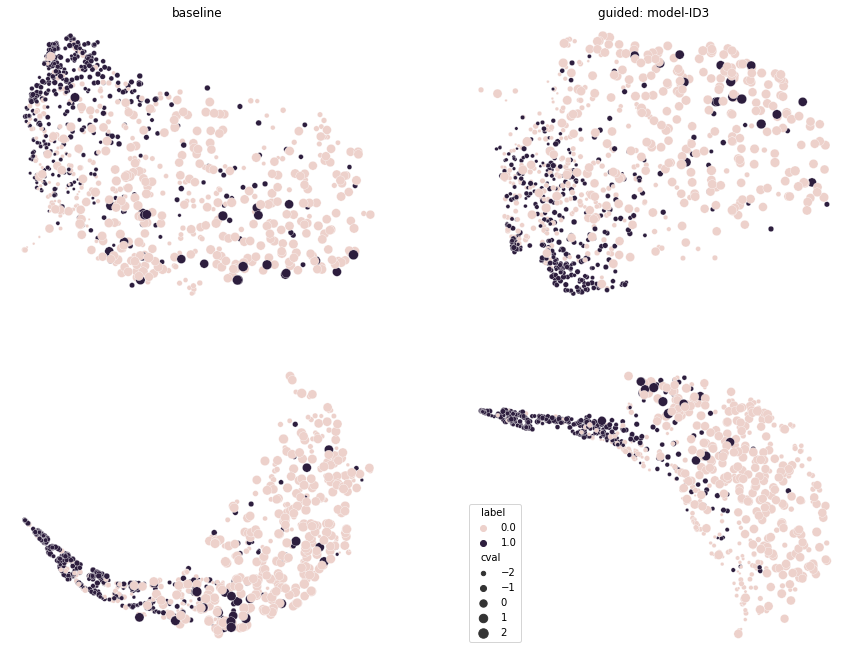

In [61]:
plt.rcParams['figure.figsize']=(15,24)
legend_bool=False
i=1
fig=plt.figure()
for layer in ['mixed10','finetuned_features1']:#, 'finetuned_features2']:#, 'finetuned_features3']:
    ax=plt.subplot(4,2,i)
    if i ==1:
        plt.title('baseline')
    sns.scatterplot(x="x", y="y",
                 hue="label",
                size="cval",sizes=(5,100),
                 #palette="Set2",
                data=base_umaps[layer],legend=False)
    #ax.axhline(y=0, color='k', linewidth=1)  # added because i want the origin
    #ax.axvline(x=0, color='k', linewidth=1)
    #plt.ylabel(layer)#, rotation='horizontal')
    #plt.text(-,5, layer)
    plt.axis('off')
    i += 1
    ax=plt.subplot(4,2,i)
    if i ==2:
        plt.title('guided: model-ID3')
    if i==4:
        legend_bool=True
        
    sns.scatterplot(x="x", y="y",
                 hue="label",
                size="cval",sizes=(5,100),
                 #palette="Set2",
                data=guided_umaps[layer],
                    legend=legend_bool
               )
    #ax.axhline(y=0, color='k', linewidth=1)  # added because i want the origin
    #ax.axvline(x=0, color='k', linewidth=1)
    if i==5:
        plt.legend(loc='lower right')
    
    plt.axis('off')
    i += 1

In [ ]:

plt.rcParams['figure.figsize']=(15,24)
legend_bool=False
i=1
fig=plt.figure()
for layer in ['mixed10']:#,'finetuned_features1', 'finetuned_features2', 'finetuned_features3']:
    plt.subplot(4,2,i)
    if i ==1:
        plt.title('base')
    sns.scatterplot(x="x", y="y",
                 hue="label",
                size="cval",sizes=(5,100),
                 palette="pastel",
                data=all_base[layer],legend=False)
    #plt.ylabel(layer)#, rotation='horizontal')
    #plt.text(-,5, layer)
    plt.axis('off')
    i += 1
    plt.subplot(4,2,i)
    if i ==2:
        plt.title('guided')
    if i==8:
        legend_bool=True
        
    sns.scatterplot(x="x", y="y",
                 hue="label",
                size="cval",sizes=(5,100),
                 palette="pastel",
                data=all_guided[layer],
                    legend=legend_bool
               )
    if i==8:
        plt.legend(loc='lower right')
    
    plt.axis('off')
    i += 1

In [ ]:
guided_umaps.